# Chạy thuật toán phân cụm phân hoạch K-Means cho dữ liệu IRIS:

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
cols = ["sepal length", "sepal width", "petal length", "petal width", "species"]

df = pd.read_csv("iris.data", names =cols)
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


E:\ML\.venv\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\ML\.venv\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\ML\.venv\Lib\site-packages\seaborn\axisgrid.py:854: U

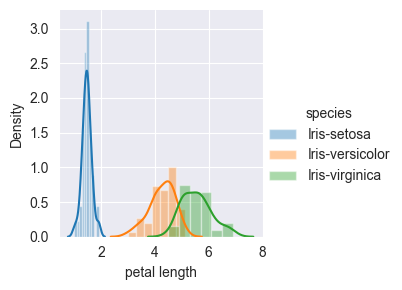

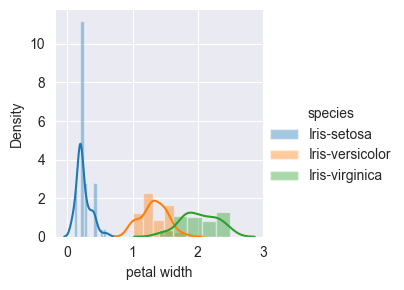

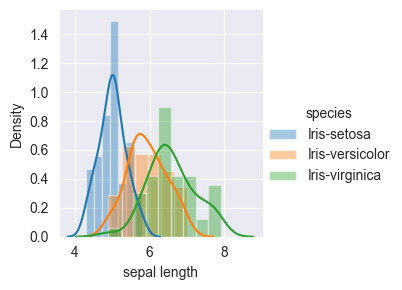

In [5]:
# Distribution plots
sns.FacetGrid(df,hue="species").map(sns.distplot,"petal length").add_legend()
sns.FacetGrid(df,hue="species").map(sns.distplot,"petal width").add_legend()
sns.FacetGrid(df,hue="species").map(sns.distplot,"sepal length").add_legend()
plt.show()

E:\ML\.venv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


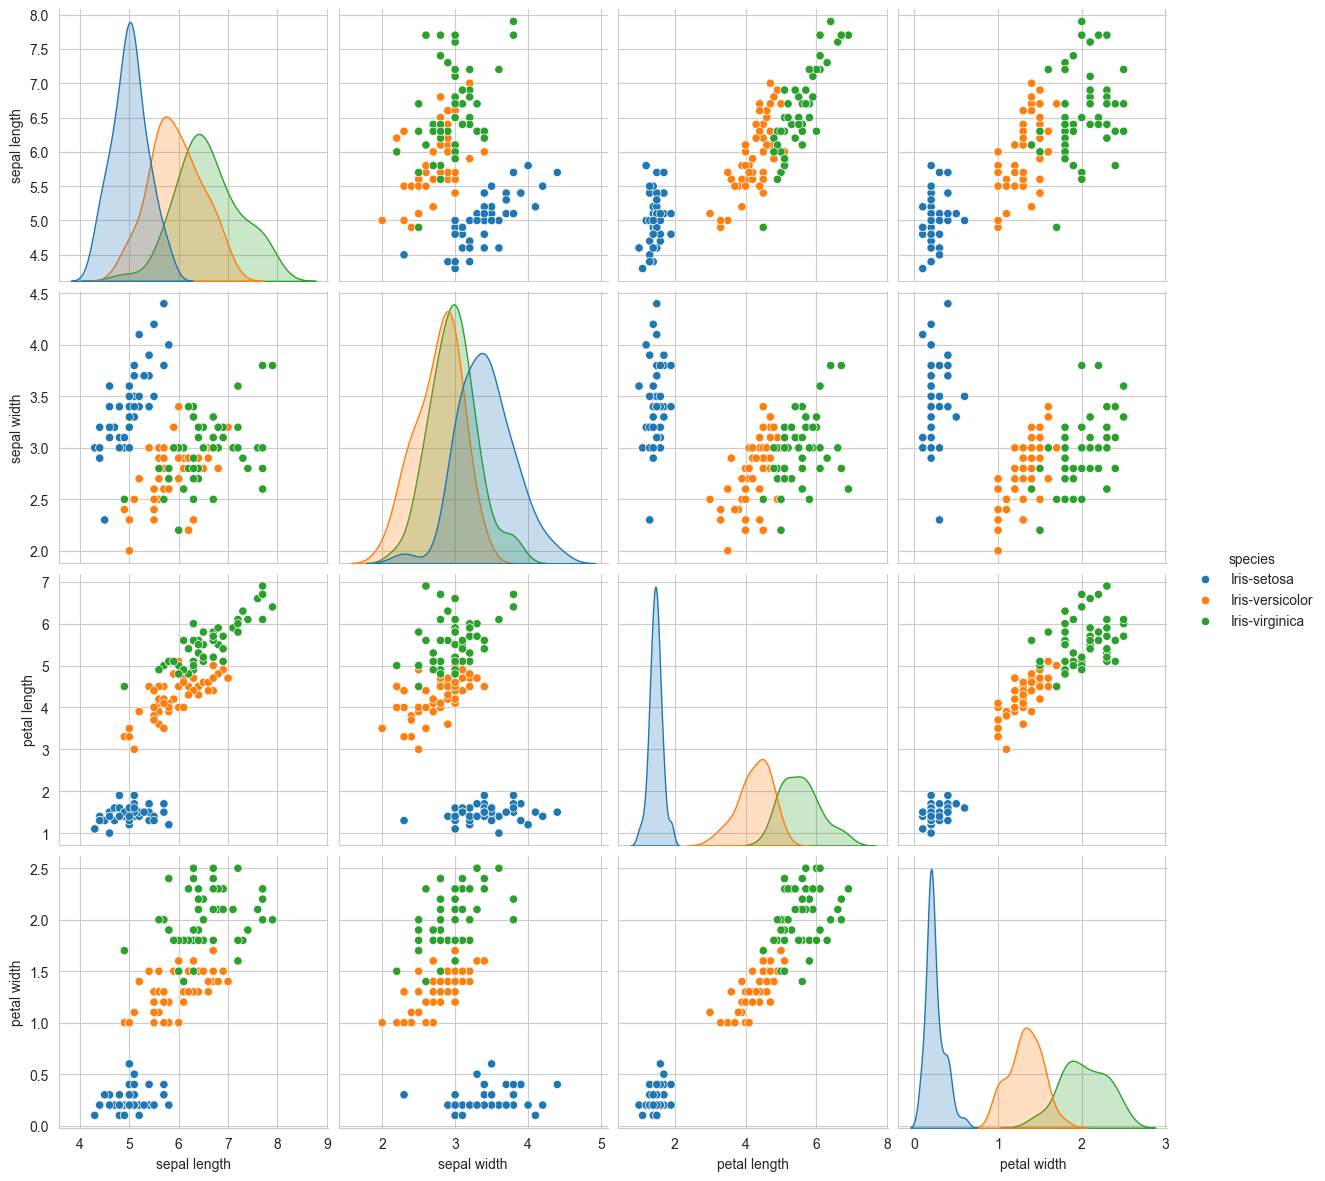

In [6]:
# Scatter plot
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3)
plt.show()

In [7]:
y = df['species']

y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [8]:
# CHuyển các nhãn về dạng 0, 1, 2
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
X = df.drop("species", axis = 1)

In [10]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Phân cụm phân hoạch

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)

y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [12]:
df['cluster'] = y_kmeans
df.head()

,sepal length,sepal width,petal length,petal width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [13]:
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)

Centers found by scikit-learn:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


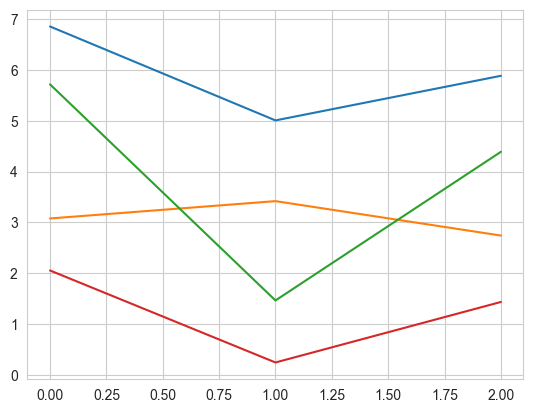

In [14]:
plt.plot(kmeans.cluster_centers_)

### Visualize the clusters 2D

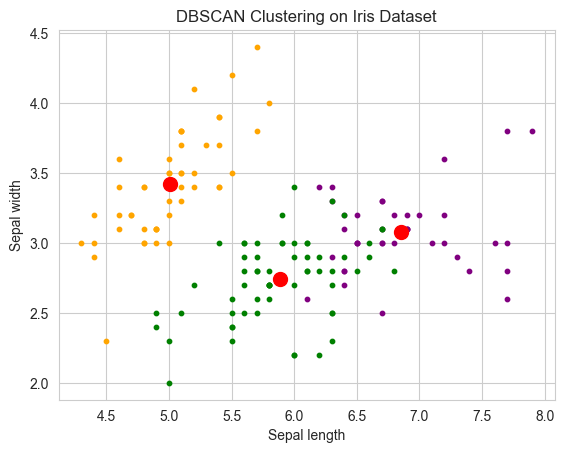

In [15]:
#Visualising the clusters
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 10, c = 'purple')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 10, c = 'orange')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 10, c = 'green')

# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis')
# plt.xlabel('Sepal Length')
# plt.ylabel('Sepal Width')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.xlabel('Sepal length') 
plt.ylabel('Sepal width')

plt.title('DBSCAN Clustering on Iris Dataset')
plt.show()

In [16]:
sse = []

range_k = range(1, 10)
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

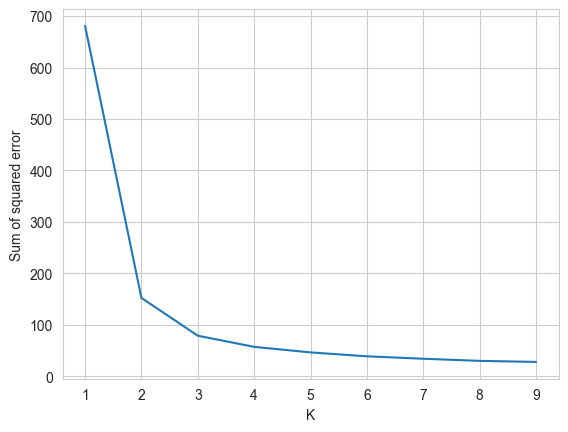

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range_k,sse)

## Phân cụm theo mật độ DBSCAN, DBSCAN2

### DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

y_dbscan = dbscan.fit_predict(X)

In [19]:
print("DBSCAN Clusters:")
print(y_dbscan)

DBSCAN Clusters:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


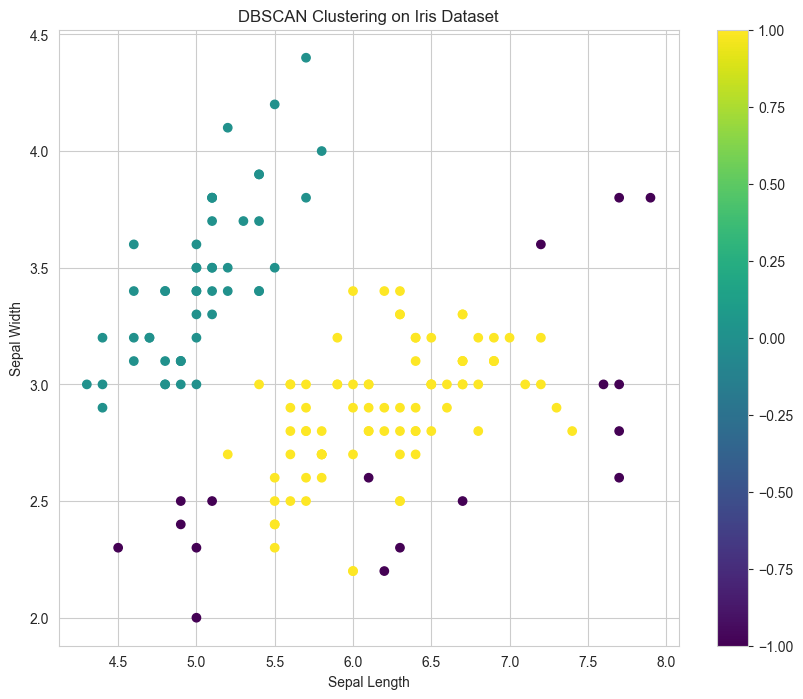

In [20]:
# Vẽ biểu đồ cluster
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_dbscan, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN Clustering on Iris Dataset')
plt.colorbar()
plt.show()

## Phân cụm phân cấp


In [21]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

y_hc = hc.fit_predict(X) 
print(y_hc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


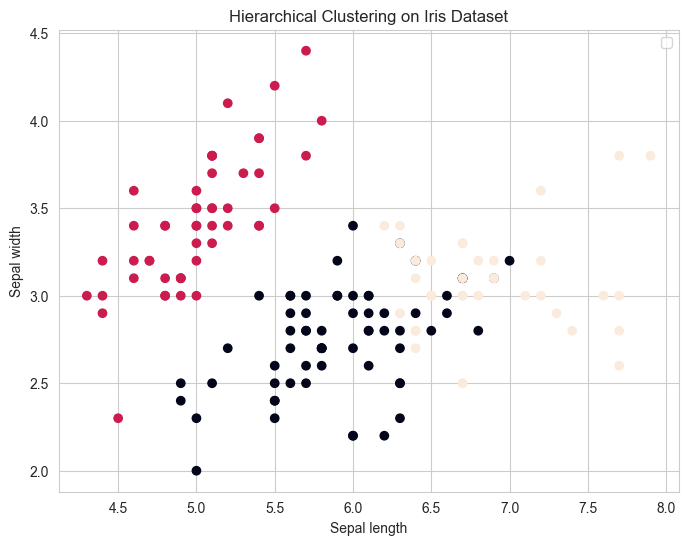

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_hc)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


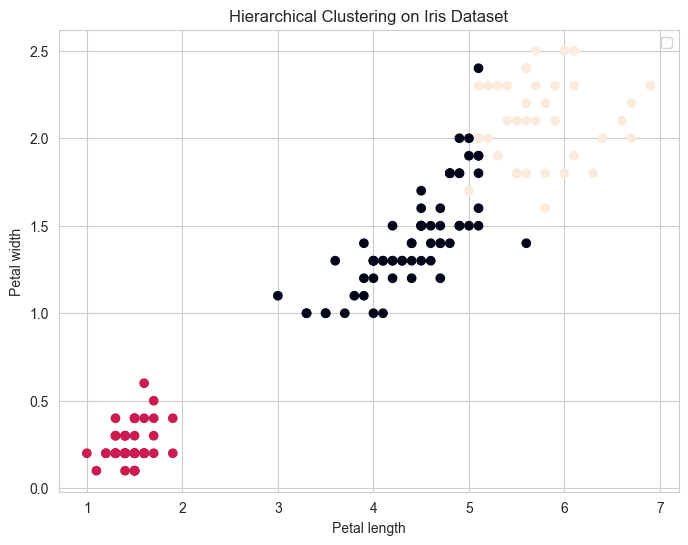

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y_hc)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.legend()
plt.show()

## Thực hiện đánh giá cụm

### Internal

1. Đánh giá trong (internal evaluation): Kết quả phân cụm được đánh giá dựa trên chính dữ liệu được phân cụm bằng cách sử dụng các đại lượng đánh giá sự gắn kết cụm như mật độ ( density), khoảng cách giữa các phần tử bên trong cụm hay khoảng cách giữa các cụm với nhau, ... Hướng tiếp cận của loại này dựa trên tiêu 15 chí: các thuật toán phân cụm tốt là các thuật toán tạo ra các cụm mà các phần tử bên trong mỗi cụm có độ tương tự với nhau lớn và độ tương tự với các phần tử bên
ngoài nhỏ.

2. Silhouette Score là một độ đo đánh giá chất lượng của các cụm, dựa trên sự so sánh của mỗi điểm dữ liệu với các điểm dữ liệu trong cùng cụm và các cụm khác. 
Giá trị Silhouette Score dao động trong khoảng từ -1 đến 1, trong đó:

    - Giá trị 1 biểu thị các cụm được phân chia tốt.
    - Giá trị 0 biểu thị các cụm chồng chéo.
    - Giá trị -1 biểu thị các cụm được phân chia không tốt.

Giả sử mạng lưới được chia thành k cụm. Với mỗi node i, đặt:
-  a(i) là khoảng cách trung bình từ i tới tất cả các node trong cùng cụm với i.
- b(i) là khoảng cách trung bình ngắn nhất từ i tới bất kỳ cụm nào không chứa i.
- Cụm tương ứng với b(i) này được gọi là cụm hàng xóm của i

Khi đó:
s(i) = (b(i) -a(i))/max{b(i), a(i)}


In [24]:
import numpy as np

def silhouette_score(X, labels):
    n = len(X)
    s = np.zeros(n)

    for i in range(n):
        a = 0  # Average distance to other points in the same cluster
        b = float('inf')  # Minimum average distance to points in other clusters

        for j in range(n):
            if labels[j] == labels[i]:
                a += np.linalg.norm(X.iloc[i] - X.iloc[j])
        a /= (np.sum(labels == labels[i]) - 1)

        for label in set(labels):
            if label != labels[i]:
                temp = 0
                for j in range(n):
                    if labels[j] == label:
                        temp += np.linalg.norm(X.iloc[i] - X.iloc[j])
                temp /= np.sum(labels == label)
                b = min(b, temp)

        s[i] = (b - a) / max(a, b)

    return np.mean(s)

In [25]:
# Sử dụng hàm tính Silhouette Score
silhouette_kmeans = silhouette_score(X, y_kmeans)
silhouette_dbscan = silhouette_score(X, y_dbscan)
silhouette_hc = silhouette_score(X, y_hc)

In [26]:
print(f"K-Means Clustering:")
print(f"Silhouette Score kmeans: {silhouette_kmeans:.3f}")
print(f"Silhouette Score dbscan: {silhouette_dbscan:.3f}")
print(f"Silhouette Score hc: {silhouette_hc:.3f}")

K-Means Clustering:
Silhouette Score kmeans: 0.551
Silhouette Score dbscan: 0.486
Silhouette Score hc: 0.554


### External

1. Đánh giá ngoài ( external evaluation ): Kết quả phân cụm được đánh giá dựa tập dữ liệu chuẩn(mẫu) đã được phân từ trước đó, còn được gọi là tập benchmark. Hướng tiếp cận của loại này đánh giá mức độ tương đồng giữa việc phân cụm bởi thuật toán với tập dữ liệu benchmark.
2. Adjust Rand Index(ARI)

ARI là một độ đo dùng để đánh giá kết quả phân cụm so với một tập dữ liệu mẫu (benchmark) đã được gán nhãn từ trước. Nó đo lường mức độ tương đồng giữa kết quả phân cụm và phân cụm mẫu.

Cách tính: (Tập dữ liệu có N điểm dữ liệu)
1. Tập dữ liệu mẫu (benchmark) chia N điểm này thành g nhóm.
2. Kết quả phân cụm của thuật toán chia N điểm này thành c nhóm.
3. ARI tính dựa trên:
    - a: Số cặp điểm nằm cùng nhóm trong cả kết quả phân cụm và tập mẫu
    - b: Số cặp điểm nằm trong cùng nhóm trong kết quả phân cụm nhưng không cùng nhóm trong tập mẫu
    - c: Số cặp điểm nằm cùng nhóm trong tập mẫu nhưng không cùng nhóm trong kết quả phân cụm

ARI = (a - (a+b)(a+c)/(N(N-1)/2)) / ((a+b)+(a+c) - (a+(a+b)(a+c)/(N(N-1)/2)))

Giá trị ARI nằm trong khoảng [-1, 1], với:
- 1: Kết quả phân cụm hoàn toàn giống với tập mẫu
- 0: Kết quả phân cụm độc lập hoàn toàn với tập mẫu
- Giá trị âm: Kết quả phân cụm kém hơn so với ngẫu nhiên

In [27]:
# adjusted rand index
from sklearn.metrics import adjusted_rand_score
ari_kmeans = adjusted_rand_score(y, y_kmeans)
ari_dbscan = adjusted_rand_score(y, y_dbscan) 
ari_hc = adjusted_rand_score(y, y_hc)

In [28]:
print(f"Adjusted Rand Index:")
print(f"K-Means: {ari_kmeans:.3f}")
print(f"DBSCAN: {ari_dbscan:.3f}")
print(f"Hierarchical: {ari_hc:.3f}")

Adjusted Rand Index:
K-Means: 0.716
DBSCAN: 0.521
Hierarchical: 0.731
